In [1]:
# Lire les données des AWS S3 bucket
import os
from pyspark.sql import SparkSession

# Créer une Session Spark avec les configurations AWS
spark = SparkSession \
    .builder \
    .appName("ReadS3Data") \
    .config("spark.jars", "/usr/local/spark/jars/hadoop-aws-3.3.1.jar,/usr/local/spark/jars/aws-java-sdk-bundle-1.11.1026.jar") \
    .config("spark.hadoop.fs.s3a.access.key", os.environ['AWS_ACCESS_KEY_ID']) \
    .config("spark.hadoop.fs.s3a.secret.key", os.environ['AWS_SECRET_ACCESS_KEY']) \
    .config("spark.hadoop.fs.s3a.endpoint", "s3.amazonaws.com") \
    .config("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem") \
    .config("spark.hadoop.fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider") \
    .getOrCreate()

In [12]:
# Lire les données
df = spark.read.parquet(os.environ['AWS_S3_RESULT_FOLDER'])

# Afficher les données
df.show()

+---------------+---------------+--------------------+-----+
|   demande_type|   support_team|              window|count|
+---------------+---------------+--------------------+-----+
|General Inquiry|General Support|{2025-04-16 20:26...|   14|
|General Inquiry|General Support|{2025-04-16 20:27...|   19|
|        Billing|Billing Support|{2025-04-16 20:26...|   14|
|        Billing|Billing Support|{2025-04-16 20:27...|   19|
|      Technical|   Tech Support|{2025-04-16 20:26...|   13|
|      Technical|   Tech Support|{2025-04-16 20:27...|   22|
+---------------+---------------+--------------------+-----+



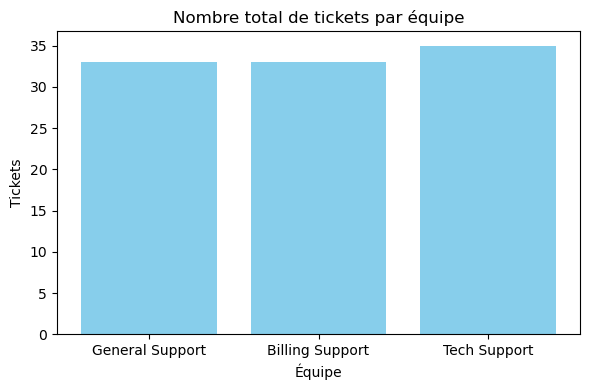

In [13]:
import matplotlib.pyplot as plt

# Regrouper par équipe et sommer les tickets
df_total = df.groupBy("support_team").sum("count").withColumnRenamed("sum(count)", "total_tickets")

# Conversion en Pandas
df_total_pd = df_total.toPandas()

# Tracer le graphique
plt.figure(figsize=(6, 4))
plt.bar(df_total_pd["support_team"], df_total_pd["total_tickets"], color="skyblue")
plt.title("Nombre total de tickets par équipe")
plt.xlabel("Équipe")
plt.ylabel("Tickets")
plt.tight_layout()
plt.show()


In [15]:
# Lire les données depuis le dossier "priorities" sur S3
df_prio = spark.read.parquet(os.path.join(os.environ["AWS_S3_RESULT_FOLDER"], "priorities"))

# Afficher un aperçu des données
df_prio.show()

+--------+--------------------+-----+
|priority|              window|count|
+--------+--------------------+-----+
|  Medium|{2025-04-16 20:26...|   15|
|    High|{2025-04-16 20:27...|   25|
|  Medium|{2025-04-16 20:27...|   18|
|  Medium|{2025-04-16 20:28...|   17|
|    High|{2025-04-16 20:28...|   19|
|    High|{2025-04-16 20:26...|   18|
|     Low|{2025-04-16 20:26...|    8|
|     Low|{2025-04-16 20:27...|   17|
|     Low|{2025-04-16 20:28...|   23|
+--------+--------------------+-----+



In [11]:
# Regrouper par priorité et sommer les tickets
df_total_prio = df_prio.groupBy("priority").sum("count").withColumnRenamed("sum(count)", "total_tickets")

# Conversion en Pandas pour visualisation
df_total_prio_pd = df_total_prio.toPandas()

# Tracer le graphique
plt.figure(figsize=(6, 4))
plt.bar(df_total_prio_pd["priority"], df_total_prio_pd["total_tickets"], color="orange")
plt.title("Nombre total de tickets par priorité")
plt.xlabel("Priorité")
plt.ylabel("Tickets")
plt.tight_layout()
plt.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `prority` cannot be resolved. Did you mean one of the following? [`priority`, `count`, `window`].;
'Aggregate ['prority], ['prority, sum(count#141L) AS sum(count)#181L]
+- Relation [priority#139,window#140-T60000ms,count#141L] parquet
